## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pystudy_df = pd.merge(mouse_metadata,study_results,on='Mouse ID')

# Display the data table for preview
pystudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
pystudy_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_filter = pystudy_df.duplicated(['Mouse ID','Timepoint'])
dup_mice = pystudy_df.loc[dup_filter,:]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse = pystudy_df.loc[:,'Mouse ID'] == 'g989'
mouse_df = pystudy_df.loc[mouse,:]
mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pystudy_df.drop(mouse_df.index)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

avg_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

med_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

var_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

std_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_stats = pd.DataFrame({'Avg Tumor Vol (mm3)':avg_tumor_vol,
                         'Median Tumor Vol (mm3)':med_tumor_vol,
                         'Variance (mm3)':var_tumor_vol,
                         'Standard Dev':std_tumor_vol,
                         'Standard Error':sem_tumor_vol}).applymap(lambda x: round(x,2))

summary_stats

,Avg Tumor Vol (mm3),Median Tumor Vol (mm3),Variance (mm3),Standard Dev,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

grouped_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

summary_stats = grouped_df.agg([('Avg Tumor Vol (mm3)','mean'),
                         ('Median Tumor Vol (mm3)','median'),
                         ('Variance (mm3)','var'),
                         ('Standard Dev','std'),
                         ('Standard Error','sem')]).applymap(lambda x: round(x,2))

summary_stats



,Avg Tumor Vol (mm3),Median Tumor Vol (mm3),Variance (mm3),Standard Dev,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<IPython.core.display.Javascript object>


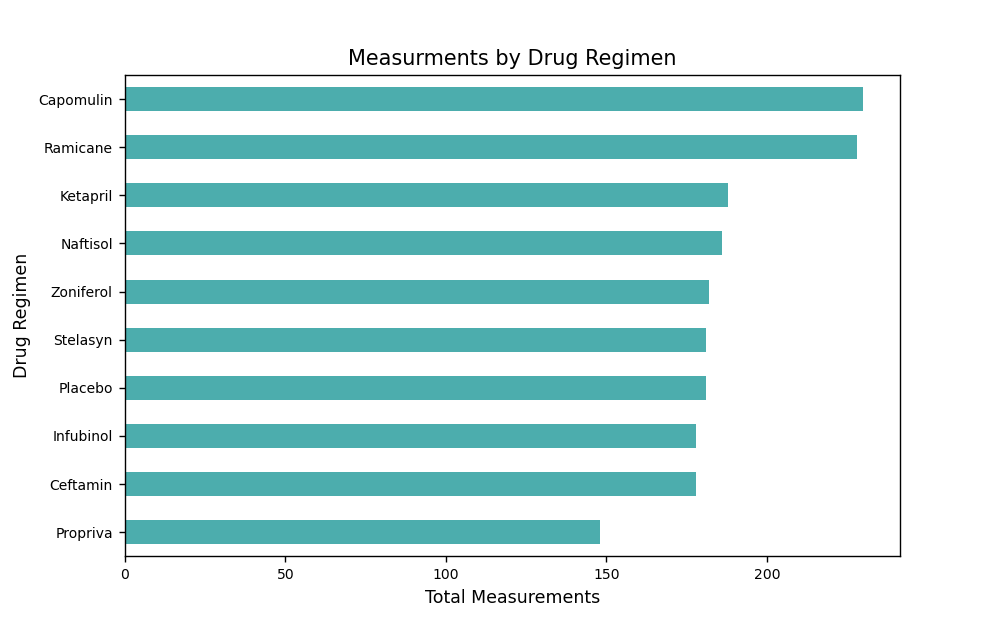

Text(0.5, 0, 'Total Measurements')

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Group de-duped data by drug regimen and extract record count by unique ID...sort values for aesthetics:
total_meas = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values()

# Plot horizontal bar chart:
total_meas.plot.barh(figsize=(8,5),color='darkcyan',alpha=0.7,fontsize=8)
plt.title('Measurments by Drug Regimen')
plt.xlabel('Total Measurements')

<IPython.core.display.Javascript object>


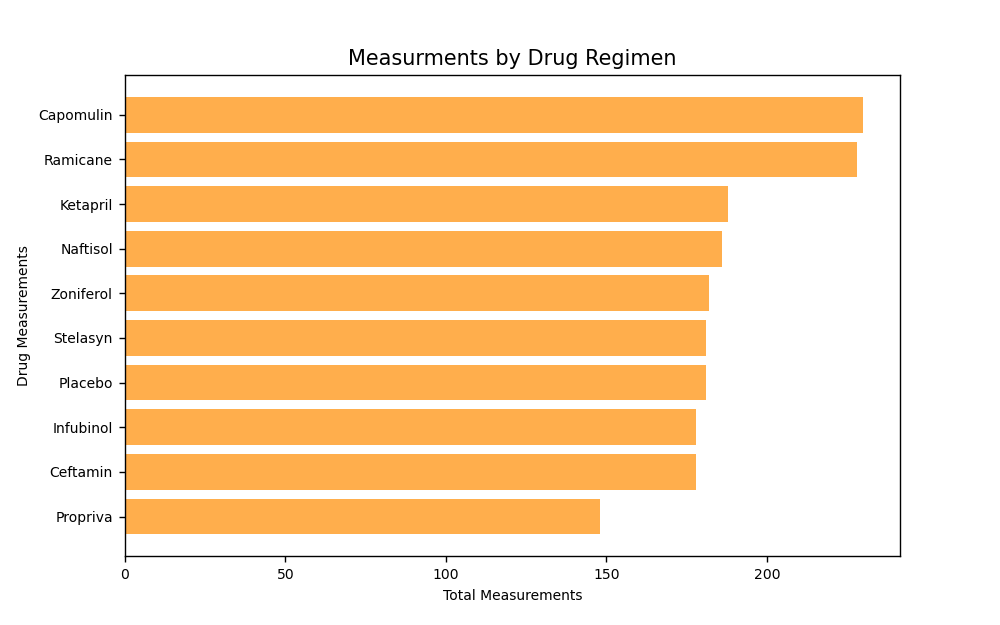

<BarContainer object of 10 artists>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Convert grouped dataframe index into x-values for plotting:
drugs = total_meas.index.tolist()

# Call pylot figure routine and plot bar graph:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
plt.title('Measurments by Drug Regimen')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Total Measurements',fontsize=8)
plt.ylabel('Drug Measurements',fontsize=8)
plt.barh(drugs,total_meas,color='darkorange',align='center',alpha=0.7)

<IPython.core.display.Javascript object>


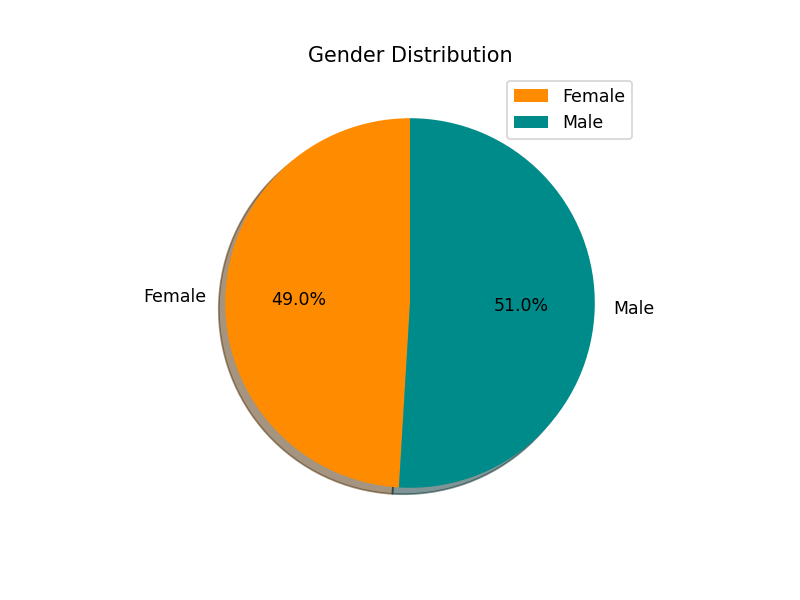

Text(0.5, 1.0, 'Gender Distribution')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.

# Group de-duped dataframe by gender and count records, convert from series to df for plotting:
gndr = pd.DataFrame(clean_df.groupby('Sex')['Mouse ID'].count())

# Plot the pie chart:
gndr.plot.pie(subplots=True,colors=['darkorange','darkcyan'],startangle=90,
              autopct='%1.1f%%',shadow=True)

# Force the y-label to dissapear:
plt.ylabel('')
plt.title('Gender Distribution')

<IPython.core.display.Javascript object>


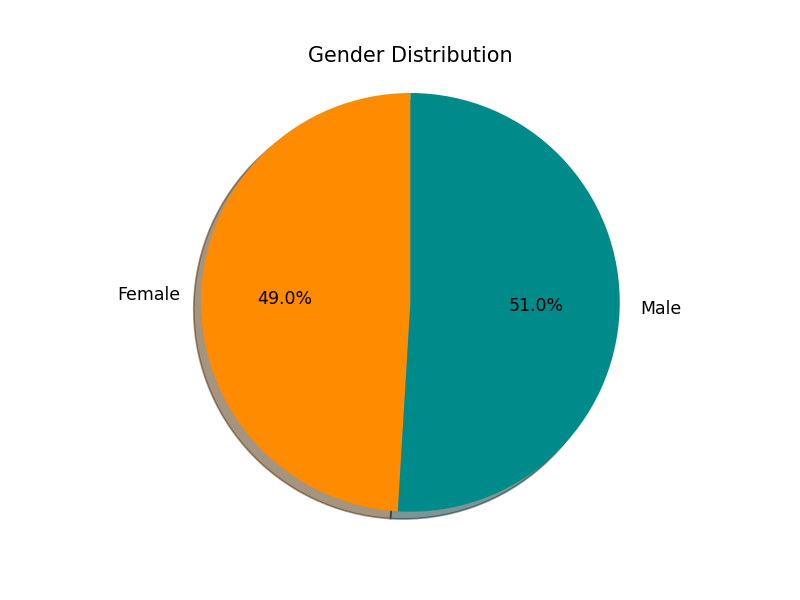

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.

# Organize x and y values to lists for plotting:
labels = gndr.index.tolist()
sizes = gndr.iloc[:,0]

# Call pyplot routine to render pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['darkorange','darkcyan'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_max = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(time_max,clean_df,on=['Mouse ID','Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Loop through previously merged dataframe and calculate the IQR  
# and quantitatively determine if there are any potential outliers by treatment. 

for drug in treatments:
    
    # Filter merged dataset on drug regimen and select tumor volume data, assing to variable:
    data = merged_df[merged_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    
    # Using quantile generator calculate iqr and identify outliers by treatment:
    quartiles = data.quantile([0.25,0.75])
    iqr = quartiles.max()-quartiles.min()
    lower = quartiles.min()-(1.5*iqr)
    upper = quartiles.max()+(1.5*iqr)
    outlier_filter = (data[:] < lower)|(data[:]>upper) 
    outliers = data.loc[outlier_filter]
    
    # Add tumor volume by drug regimen to list for plotting in single figure
    tumor_vol.append(data)
    
    print(f'There are {outliers.count()} outliers over the {drug} dataset')

There are 0 outliers over the Capomulin dataset
There are 0 outliers over the Ramicane dataset
There are 1 outliers over the Infubinol dataset
There are 0 outliers over the Ceftamin dataset


<IPython.core.display.Javascript object>


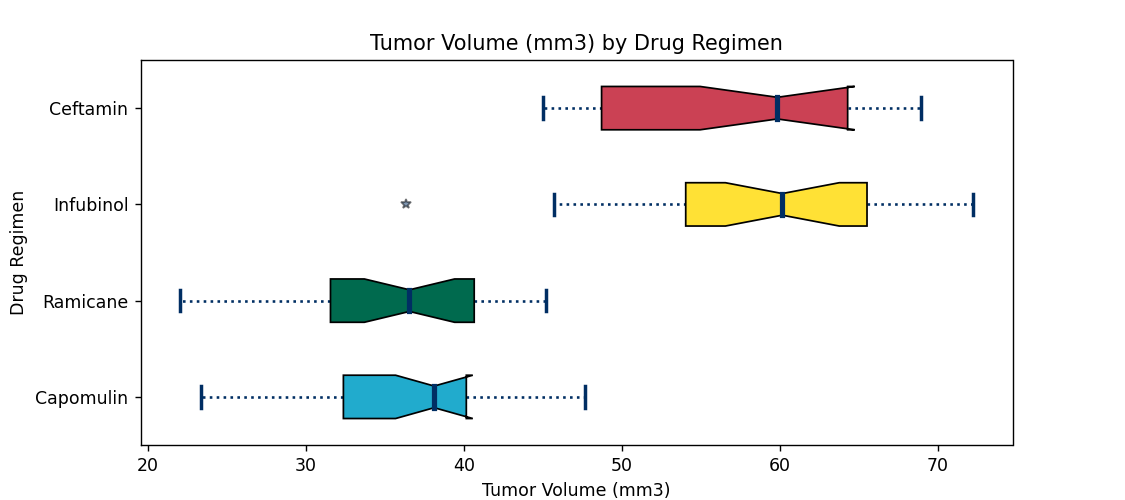

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(figsize =(9, 4)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(tumor_vol, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#21abcd', '#006a4e',  
          '#ffe135', '#cb4154'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#002e63', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#002e63', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='#002e63', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='*', 
              markerfacecolor ='#002e63', 
              alpha = 0.5) 
      
# y-axis labels 
ax.set_yticklabels(treatments) 
  
# Adding title  
plt.title("Tumor Volume (mm3) by Drug Regimen") 
  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 

# Clean up axis labels
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')

# show plot 
plt.show() 


## Line and Scatter Plots

<IPython.core.display.Javascript object>


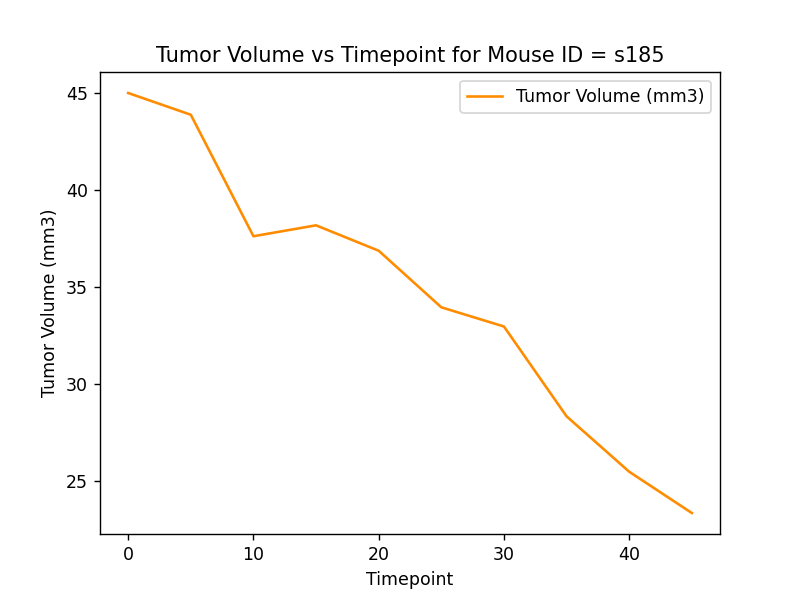

Text(0.5, 1.0, 'Tumor Volume vs Timepoint for Mouse ID = s185')

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.

# Filter de-duped dataframe by Capomulin drug regimen
cap_filter = clean_df.loc[:,'Drug Regimen']=='Capomulin'
cap_df = clean_df.loc[cap_filter,:]

# Assign all data for first mouse in Capomulin dataframe to dataset, set index to timepoint for plotting
mouse = cap_df[:10].set_index('Timepoint')

# Using pandas plot Tumor volume vs. Timepoint for the chosen mouse
pd.DataFrame(mouse['Tumor Volume (mm3)']).plot.line(color='darkorange')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs Timepoint for Mouse ID = {mouse.loc[0,"Mouse ID"]}')

<IPython.core.display.Javascript object>


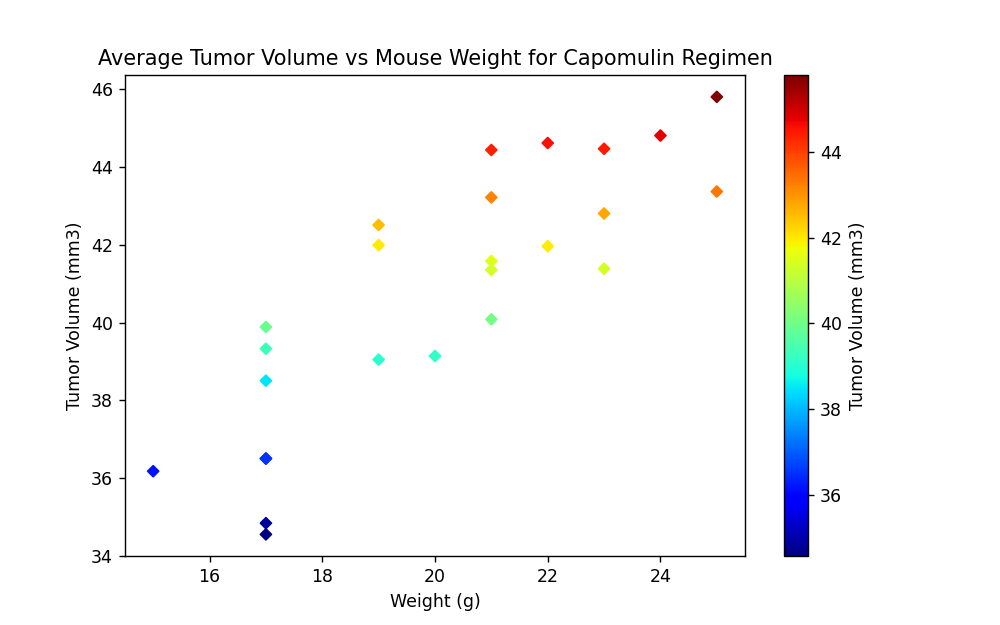

Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight for Capomulin Regimen')

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe with average tumor volume and average mouse weight for plotting
scatter_data = cap_df.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()

# Plot scatter plot using pandas, enforce cold to warm color gradiant based on Tumor Volume
scatter_data.plot.scatter('Weight (g)', 'Tumor Volume (mm3)', c='Tumor Volume (mm3)',
                          colormap='jet',marker='D',figsize=(8,5))
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin Regimen')


## Correlation and Regression

<IPython.core.display.Javascript object>


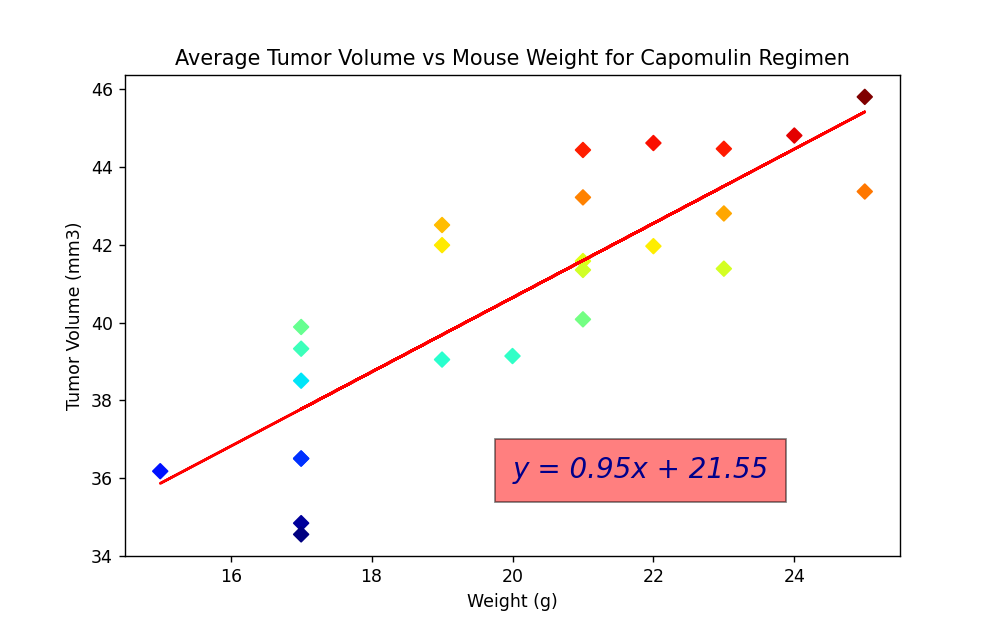

The Correlation Coefficient is: 0.84
The r-squared is: 0.7088568047708717


In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

# Using scipy assign pearson correlation (Weight vs Volume) to a variable
correlation = st.pearsonr(scatter_data["Weight (g)"],scatter_data["Tumor Volume (mm3)"])

# Break out columns into x and y series for plotting
x_values = scatter_data['Weight (g)']
y_values = scatter_data['Tumor Volume (mm3)']

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate target values for regression line 
regress_values = x_values * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Use pyplot routine to plot figure, regression line, and regression equation
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x_values,y_values,c=scatter_data['Tumor Volume (mm3)'],
            cmap='jet', marker='D')
ax.plot(x_values,regress_values,"r-")
ax.text(20,36,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Print the correclation coeffecient and r-squared value to weigh and validate association 
print(f'The Correlation Coefficient is: {round(correlation[0],2)}')
print(f"The r-squared is: {rvalue**2}")
plt.show()